In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.metrics import f1_score, mean_squared_error

In [4]:
mean_squared_error?

In [2]:
sns.set_style('darkgrid')
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [6]:
train.head()

id  X00    X01  X02  X03  X04     X05    X06   X07     X08     X09  X10  \
0   0  9.7  988.8  1.2  0.6  0.0  1009.3  989.6  12.2  1009.9  1009.8  0.0   
1   1  9.3  988.9  1.7  1.9  0.0  1009.3  989.6  12.1  1010.0  1009.9  0.0   
2   2  9.4  989.0  1.1  2.3  0.0  1009.2  989.7  12.1  1010.1  1010.1  0.0   
3   3  9.4  988.9  1.5  0.7  0.0  1009.2  989.6  12.0  1010.0  1010.0  0.0   
4   4  9.2  988.9  0.8  1.7  0.0  1009.2  989.7  12.0  1010.1  1010.0  0.0   

   X11   X12    X13  X14    X15  X16    X17  X18  X19   X20  X21     X22  \
0  0.0  82.4   71.3  0.0  101.1  0.0   56.1  0.3  0.0  91.0  0.0  1002.5   
1  0.0  81.2  121.8  0.0  165.3  0.0    0.0  0.4  0.0  91.9  0.0  1002.5   
2  0.0  86.1  232.0  0.0  144.0  0.0    0.0  0.6  0.0  93.3  0.0  1002.4   
3  0.0  87.7    0.0  0.0  115.9  0.0  294.1  0.1  0.0  93.4  0.0  1002.4   
4  0.0  88.9    0.0  0.0  124.7  0.0    0.0  0.0  0.0  94.1  0.0  1002.4   

      X23  X24  X25  X26     X27   X28     X29   X30  X31   X32     X33  X34  \
0  1009.8  1.1  2.3  0.5  1008.7  12.3  1001.6  69.1  8.2  10.7  1010.1  0.0   
1  1009.9  0.0  0.0  0.0  1008.7  12.1  1001.7  70.3  8.3  10.3  1010.1  0.0   
2  1009.8  0.0  0.0  0.0  1008.6  12.1  1001.6  71.5  8.0   9.7  1010.0  0.0   
3  1009.7  0.0  0.0  0.2  1008.7  12.1  1001.5  73.2  7.7   9.4  1010.1  0.0   
4  1009.7  0.0  0.0  0.0  1008.7  12.0  1001.5  74.3  7.4   9.4  1010.1  0.0   

     X35  X36   X37   X38  X39   Y00   Y01   Y02   Y03   Y04   Y05   Y06  \
0  256.4  0.0  77.2  62.6  0.0  12.5  11.5  11.0  20.0  20.0  10.5  10.0   
1  215.4  0.0  77.3  63.5  0.0  12.5  11.0  11.0  20.0  20.0  10.0   9.5   
2  235.2  0.0  77.3  63.9  0.0  12.0  11.0  11.0  19.5  19.5  10.0   9.0   
3  214.0  0.0  77.5  64.5  0.0  12.0  11.0  11.0  19.5  19.5   9.5   9.0   
4  174.9  0.0  78.0  65.0  0.0  12.0  10.5  10.5  19.0  19.5   9.5   8.5   

    Y07   Y08  Y09  Y10  Y11  Y12   Y13  Y14  Y15  Y16  Y17  Y18  
0  10.5  10.0  7.0  7.5  7.0  9.0  10.0  9.5  9.0  8.0  9.0  NaN  
1  10.0   9.5  6.5  7.5  7.0  8.5  10.0  9.5  9.0  7.5  9.0  NaN  
2  10.0   9.0  6.5  7.5  6.5  8.0   9.5  9.5  8.5  7.5  8.5  NaN  
3   9.5   9.0  6.0  7.0  6.0  8.0   9.5  9.0  8.5  7.5  8.5  NaN  
4   9.5   8.5  6.0  7.0  6.0  7.5   9.5  9.0  8.5  7.5  8.5  NaN

In [7]:
test.head()

id   X00    X01  X02  X03  X04     X05    X06   X07     X08     X09  X10  \
0  4752  18.7  987.4  1.5  1.3  0.0  1006.8  987.7  21.1  1007.5  1007.2  0.0   
1  4753  18.8  987.4  1.1  1.2  0.0  1006.7  987.7  21.2  1007.5  1007.2  0.0   
2  4754  19.0  987.4  1.3  1.2  0.0  1006.6  987.6  21.2  1007.4  1007.2  0.0   
3  4755  18.7  987.4  2.3  0.8  0.0  1006.6  987.6  21.1  1007.4  1007.2  0.0   
4  4756  18.4  987.4  1.1  0.7  0.0  1006.7  987.7  20.9  1007.5  1007.2  0.0   

   X11   X12    X13  X14    X15  X16    X17  X18  X19   X20  X21     X22  \
0  0.0  96.1  333.6  0.0  199.6  0.0   36.0  1.1  0.0  94.7  0.0  1000.3   
1  0.0  96.2  335.5  0.0  194.0  0.0  127.7  0.6  0.0  95.3  0.0  1000.2   
2  0.0  96.4    0.0  0.0  172.9  0.0   59.0  0.0  0.0  93.9  0.0  1000.1   
3  0.0  96.5  252.9  0.0  153.5  0.0   54.9  0.4  0.0  94.4  0.0  1000.1   
4  0.0  96.6  238.2  0.0  173.8  0.0   48.8  0.8  0.0  95.7  0.0  1000.2   

      X23  X24  X25  X26     X27   X28    X29   X30   X31   X32     X33  X34  \
0  1007.6  0.0  0.0  0.1  1006.0  23.2  999.5  91.4  17.5  19.2  1007.6  0.0   
1  1007.5  0.0  0.0  0.3  1005.9  23.1  999.4  91.6  17.4  19.1  1007.5  0.0   
2  1007.4  0.0  0.0  0.7  1005.9  23.1  999.3  92.0  17.2  19.0  1007.5  0.0   
3  1007.4  0.0  0.0  0.6  1005.8  22.8  999.3  93.0  17.2  18.8  1007.4  0.0   
4  1007.3  0.0  0.0  0.7  1005.9  22.8  999.2  92.3  17.4  18.9  1007.5  0.0   

     X35  X36   X37   X38  X39  
0  194.7  0.0  84.0  59.9  0.0  
1  173.1  0.0  84.0  60.5  0.0  
2  208.6  0.0  85.0  60.8  0.0  
3  185.0  0.0  85.8  61.2  0.0  
4  162.8  0.0  87.3  61.7  0.0

In [8]:
print(train.shape, test.shape)

(4752, 60) (11520, 41)


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4752 entries, 0 to 4751
Data columns (total 60 columns):
id     4752 non-null int64
X00    4752 non-null float64
X01    4752 non-null float64
X02    4752 non-null float64
X03    4752 non-null float64
X04    4752 non-null float64
X05    4752 non-null float64
X06    4752 non-null float64
X07    4752 non-null float64
X08    4752 non-null float64
X09    4752 non-null float64
X10    4752 non-null float64
X11    4752 non-null float64
X12    4752 non-null float64
X13    4752 non-null float64
X14    4752 non-null float64
X15    4752 non-null float64
X16    4752 non-null float64
X17    4752 non-null float64
X18    4752 non-null float64
X19    4752 non-null float64
X20    4752 non-null float64
X21    4752 non-null float64
X22    4752 non-null float64
X23    4752 non-null float64
X24    4752 non-null float64
X25    4752 non-null float64
X26    4752 non-null float64
X27    4752 non-null float64
X28    4752 non-null float64
X29    4752 non-null floa

In [10]:
train.describe()

id          X00          X01          X02          X03  \
count  4752.00000  4752.000000  4752.000000  4752.000000  4752.000000   
mean   2375.50000    20.227904   988.621107     1.509764     1.453157   
std    1371.92857     4.707570     3.359916     1.071858     0.936151   
min       0.00000     8.300000   977.300000     0.000000     0.000000   
25%    1187.75000    16.900000   986.800000     0.700000     0.800000   
50%    2375.50000    19.900000   988.600000     1.300000     1.300000   
75%    3563.25000    24.100000   991.000000     2.100000     2.000000   
max    4751.00000    30.900000   997.200000    10.200000     5.800000   

               X04          X05          X06          X07          X08  \
count  4752.000000  4752.000000  4752.000000  4752.000000  4752.000000   
mean      1.270223  1008.333902   989.005093    21.658081  1008.790341   
std       4.429852     3.395037     3.403714     4.377216     3.520317   
min       0.000000   997.200000   978.100000    11.600000   997.300000   
25%       0.000000  1006.500000   987.100000    18.400000  1006.700000   
50%       0.000000  1008.500000   989.100000    21.200000  1008.800000   
75%       0.000000  1010.800000   991.600000    24.825000  1011.400000   
max      25.600000  1016.800000   997.400000    32.700000  1017.500000   

               X09          X10          X11          X12          X13  \
count  4752.000000  4752.000000  4752.000000  4752.000000  4752.000000   
mean   1008.394171     1.006734    11.008479    68.209827   161.357639   
std       3.546180     3.324415    10.873539    22.278053    98.787460   
min     996.300000     0.000000     0.000000    16.400000     0.000000   
25%    1006.300000     0.000000     0.020000    49.500000    69.225000   
50%    1008.400000     0.000000     7.690000    72.150000   182.600000   
75%    1010.900000     0.000000    22.190000    89.025000   228.925000   
max    1018.000000    18.500000    30.700000    97.900000   360.000000   

          X14          X15     X16          X17          X18     X19  \
count  4752.0  4752.000000  4752.0  4752.000000  4752.000000  4752.0   
mean      0.0   174.346654     0.0   161.823864     1.377462     0.0   
std       0.0    97.785811     0.0   115.943382     1.155024     0.0   
min       0.0     0.000000     0.0     0.000000     0.000000     0.0   
25%       0.0   115.600000     0.0    33.875000     0.500000     0.0   
50%       0.0   170.250000     0.0   190.450000     1.000000     0.0   
75%       0.0   258.400000     0.0   253.125000     2.100000     0.0   
max       0.0   359.900000     0.0   360.000000     8.900000     0.0   

               X20          X21          X22          X23          X24  \
count  4752.000000  4752.000000  4752.000000  4752.000000  4752.000000   
mean     71.478872     1.138363  1001.773190  1008.850989     0.985059   
std      21.830446     4.079039     3.367735     3.417633     1.091314   
min      19.700000     0.000000   990.800000   997.500000     0.000000   
25%      53.075000     0.000000   999.900000  1006.900000     0.000000   
50%      74.200000     0.000000  1001.900000  1008.900000     0.700000   
75%      92.600000     0.000000  1004.200000  1011.400000     1.700000   
max      97.900000    21.000000  1010.100000  1017.100000     6.000000   

               X25          X26          X27          X28          X29  \
count  4752.000000  4752.000000  4752.000000  4752.000000  4752.000000   
mean    139.524453     1.369886  1007.554924    22.079040  1000.811932   
std     131.438036     1.240900     3.446475     4.225203     3.390206   
min       0.000000     0.000000   997.200000    10.300000   989.700000   
25%       0.000000     0.300000  1005.500000    19.000000   998.900000   
50%     134.150000     1.100000  1007.700000    21.700000  1000.900000   
75%     270.900000     2.100000  1010.200000    25.200000  1003.400000   
max     359.900000     6.800000  1015.400000    33.200000  1009.000000   

               X30          X31         

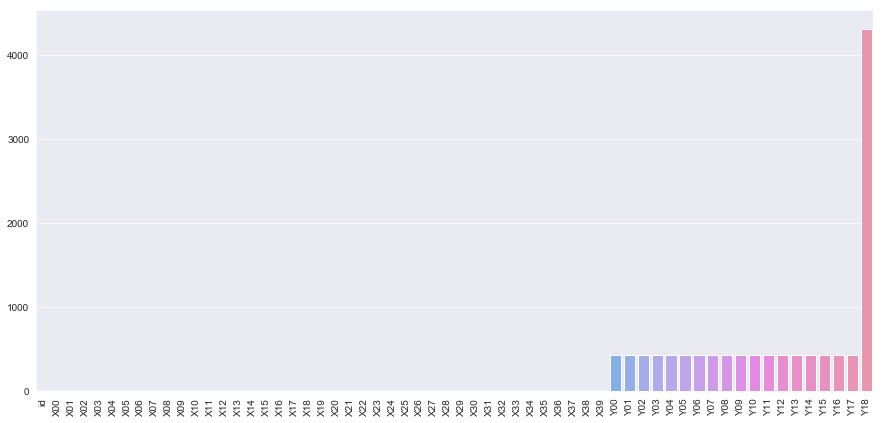

In [11]:
# NA 체킹 - train
tmp = train.isnull().sum()

plt.figure(figsize=(15,7))
sns.barplot(x=tmp.index, y=tmp)
plt.xticks(rotation=90)
plt.show()

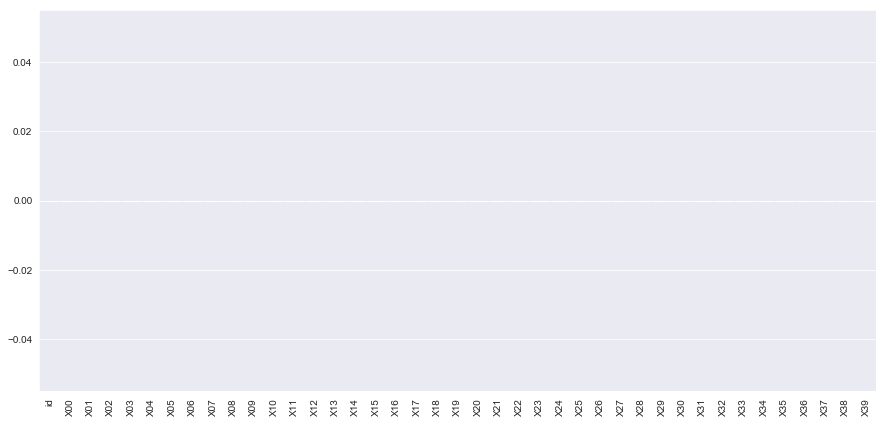

In [22]:
# NA 체킹 - test
tmp = test.isnull().sum()

plt.figure(figsize=(15,7))
sns.barplot(x=tmp.index, y=tmp)
plt.xticks(rotation=90)
plt.show()

### Y18

C:\Users\CSH\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\CSH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


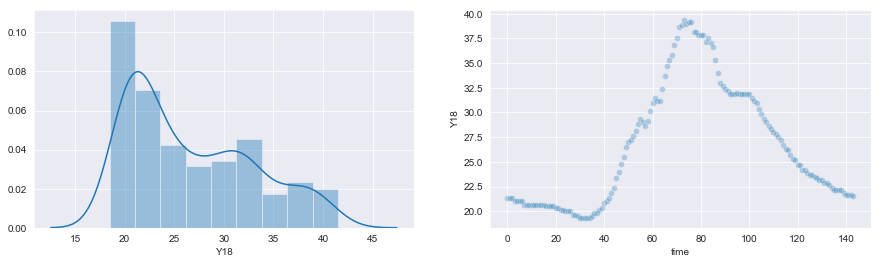

In [14]:
f, ax = plt.subplots(1,2, figsize=(15,4))

tmp = train[~train['Y18'].isnull()]
tmp['time'] = train['id']%(24*6)
sns.distplot(tmp['Y18'], ax=ax[0])
tmp_agg =  tmp.groupby('time', as_index=False)['Y18'].mean()
sns.scatterplot(x=tmp_agg['time'], y=tmp_agg['Y18'], alpha=0.3, ax=ax[1])
plt.show()

In [15]:
# 19~39도. 굉장히 더운날씨
# 35 time - 19도
# 72 time - 39도
# 90~100 time - 32도

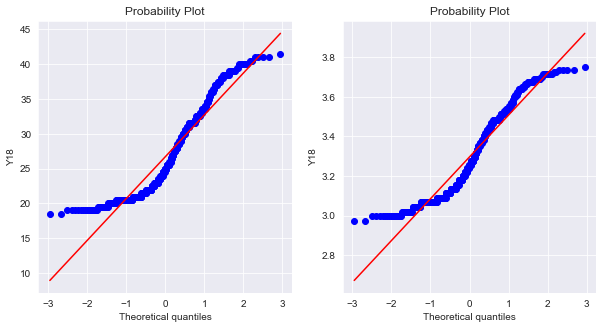

In [60]:
# qqplot

from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p, log1p

f, ax = plt.subplots(1,2,figsize=(10,5))
stats.probplot(train['Y18'][~train['Y18'].isnull()], plot=ax[0])
stats.probplot(log1p(train['Y18'][~train['Y18'].isnull()]), plot=ax[1])
ax[0].set_ylabel('Y18')
ax[1].set_ylabel('Y18')
plt.show()

### Y00~Y17

C:\Users\CSH\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\CSH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


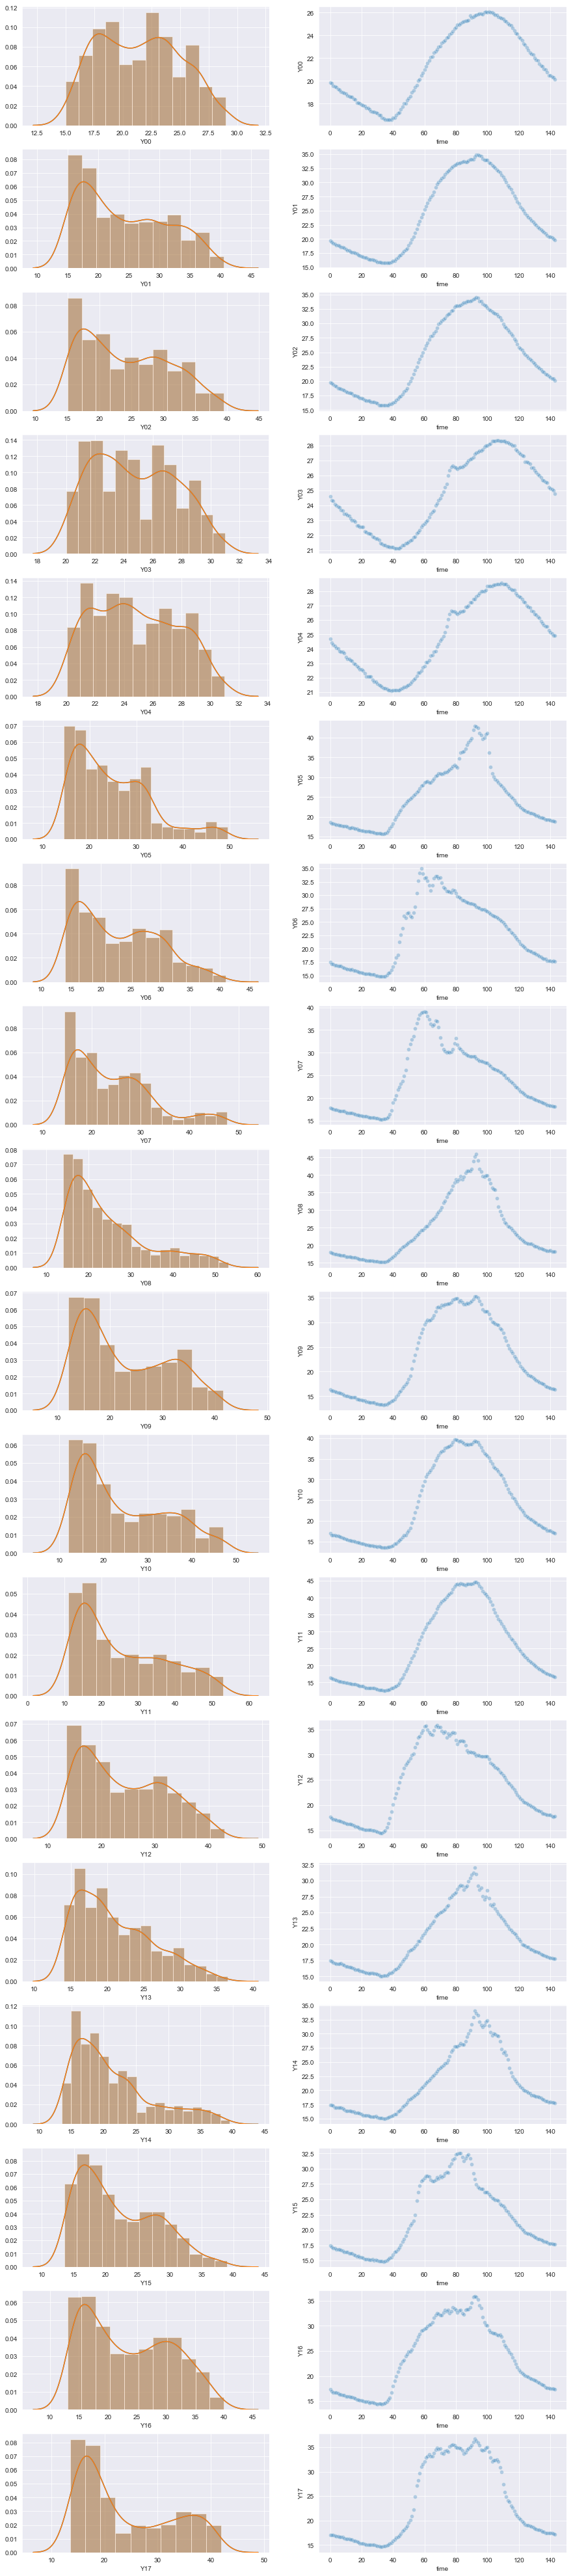

In [21]:
f, ax = plt.subplots(18,2, figsize=(15,4*18))
for i in range(18):
    if i<10:
        idx = 'Y0%d'%i
    else:
        idx = 'Y%d'%i
    tmp = train.loc[(4320 - 144*10):(4320 - 144*3)] # 최근 7일치
#     tmp = train[~train[idx].isnull()] # 전체 
    tmp['time'] = train['id']%(24*6)
    sns.distplot(tmp[idx], ax=ax[i][0])
    
    tmp_agg =  tmp.groupby('time', as_index=False)[idx].mean()
    sns.distplot(tmp[idx], ax=ax[i][0])
    sns.scatterplot(x=tmp_agg['time'], y=tmp_agg[idx], alpha=0.3, ax=ax[i][1])
plt.show()

In [ ]:
# Y12이 Y18가 가장 근사함
# 근데 날짜가 다르니까 날짜차이에 의한 기온 차이를 고려해야함 ! 

C:\Users\CSH\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\CSH\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


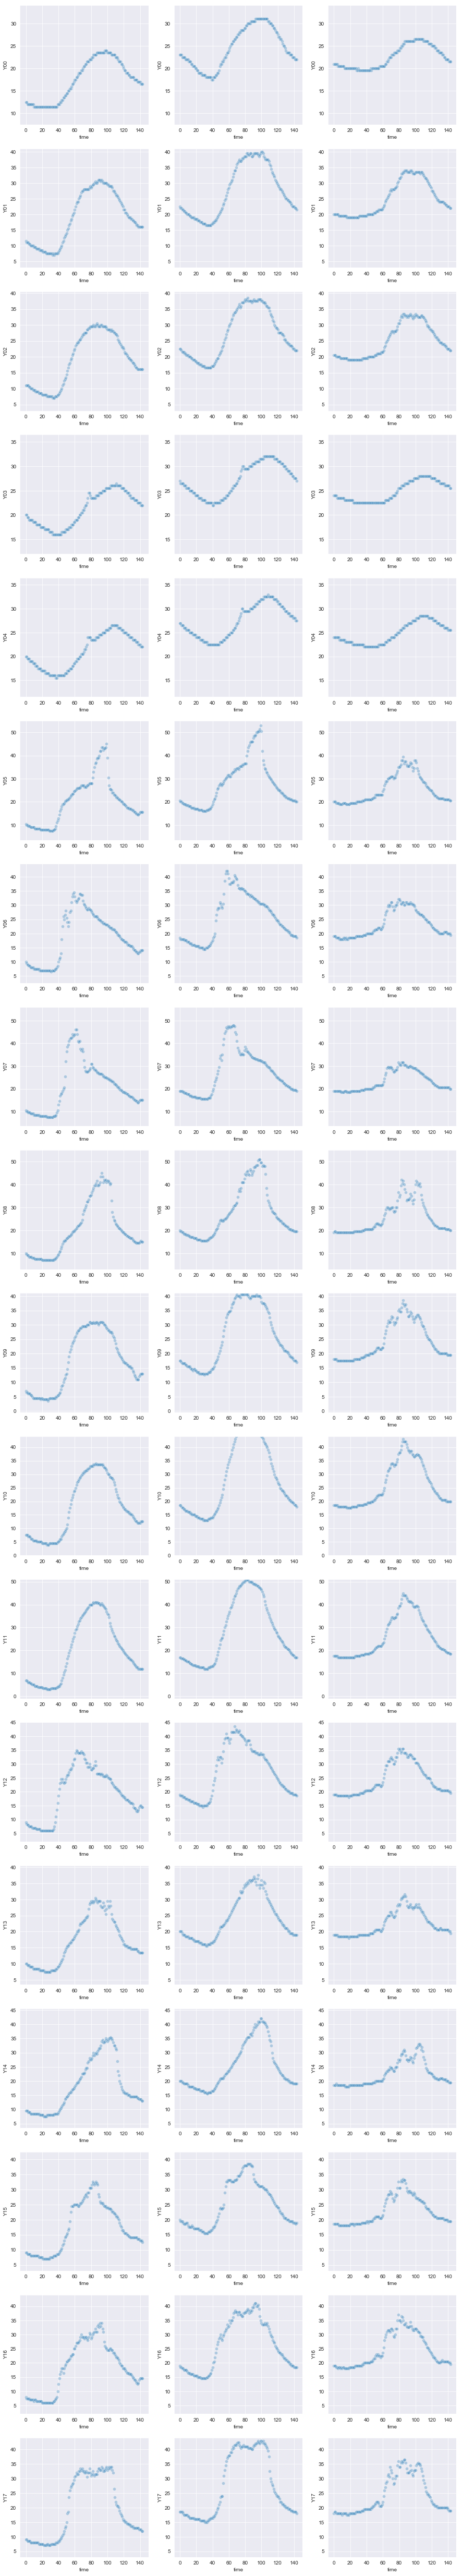

In [25]:
# Day1 vs Day30 분포 차이
tmp = train.loc[:4319]
tmp['Day'] = tmp['id']//144
tmp['time'] = tmp['id']%144

cols = [col for col in train.columns if col.startswith('Y') and col != 'Y18']
f, ax = plt.subplots(18, 3, figsize=(15, 5*18))

for i in range(len(cols)):
    sns.scatterplot(x=tmp.loc[tmp['Day']==0,'time'], y=tmp.loc[tmp['Day']==0,cols[i]], alpha=0.3, ax=ax[i][0])
    sns.scatterplot(x=tmp.loc[tmp['Day']==14,'time'], y=tmp.loc[tmp['Day']==14,cols[i]], alpha=0.3, ax=ax[i][1])
    sns.scatterplot(x=tmp.loc[tmp['Day']==29,'time'], y=tmp.loc[tmp['Day']==29,cols[i]], alpha=0.3, ax=ax[i][2])
    max_value = np.max(tmp.loc[tmp['Day']==0,cols[i]])
    min_value = np.min(tmp.loc[tmp['Day']==0,cols[i]])
    ax[i][0].set_ylim(min_value-4, max_value+10)
    ax[i][1].set_ylim(min_value-4, max_value+10)
    ax[i][2].set_ylim(min_value-4, max_value+10)
plt.show()

In [ ]:
# 차이가 많이남 

### X00~39

C:\Users\CSH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\CSH\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Users\CSH\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\CSH\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


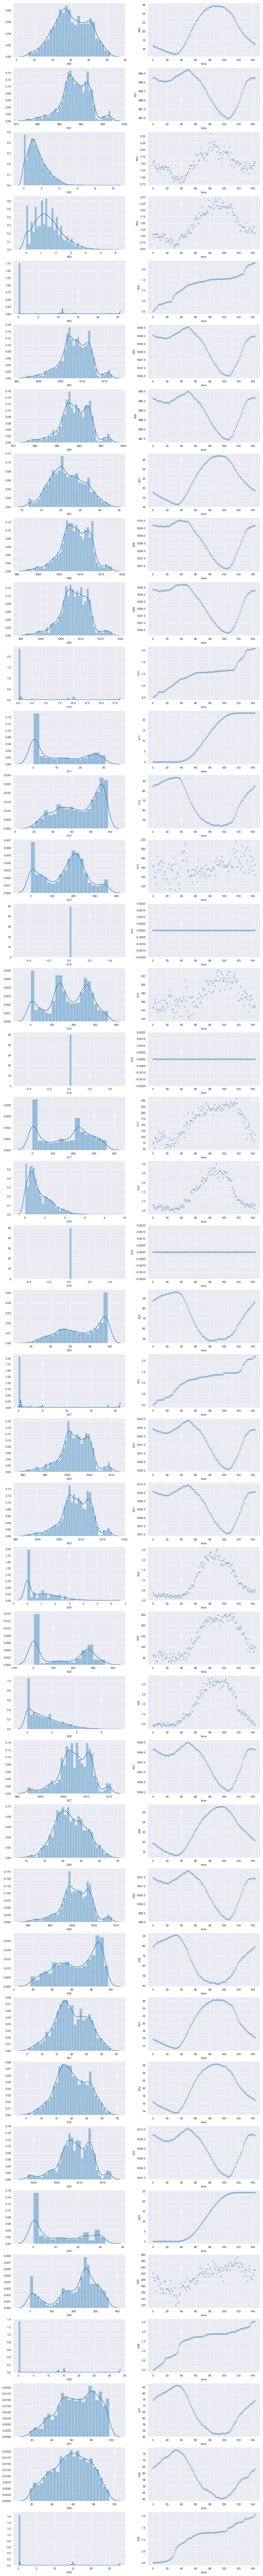

In [67]:
N=40
f, ax = plt.subplots(N, 2, figsize=(15,4*N))
tmp = train.copy()
tmp['time'] = train['id']%(24*6)

for i in range(40):
    idx = str(i)
    if len(idx) ==1:
        idx = '0'+idx
    col = 'X' + idx
    sns.distplot(tmp[col], ax=ax[i][0])
    tmp_agg =  tmp.groupby('time', as_index=False)[col].mean()
    sns.scatterplot(x=tmp_agg['time'], y=tmp_agg[col], alpha=0.3, ax=ax[i][1])
plt.show()

### Y18 - X00~39

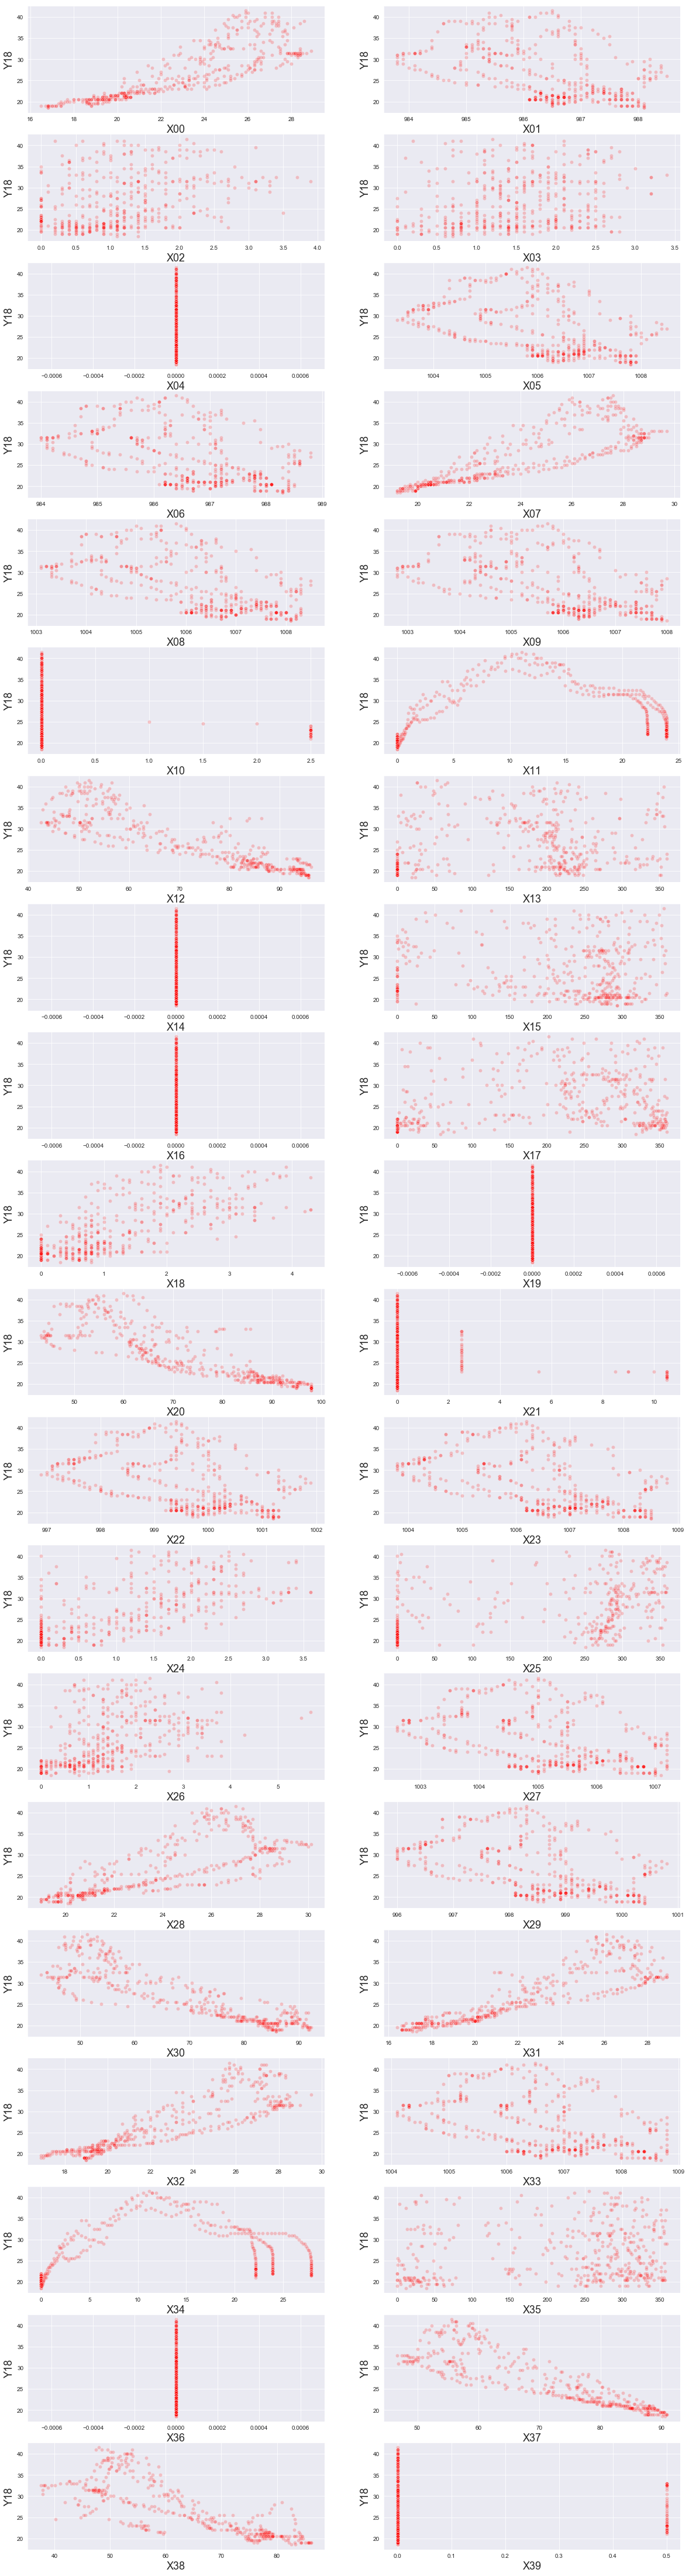

In [61]:
# Top N's scatter plots
N=40
fig, ax = plt.subplots(int(np.ceil(N/2)),2, figsize=(20,N*2))
for i, col in enumerate(['X0' + str(num) for num in range(10)] + ['X' + str(num) for num in range(10,40)]):
    sns.scatterplot(data=train, 
             x=col, 
             y="Y18", 
             alpha=0.2, 
             color='red',
             ax=ax[i//2][i%2])
    ax[i//2][i%2].set_xlabel(col, fontsize=18)
    ax[i//2][i%2].set_ylabel('Y18', fontsize=18)
plt.show()

In [ ]:
# X00, X07, X12, X18, X20 ,X28, X30, X31, X32, X37, X38

### Y18 - Y00~17

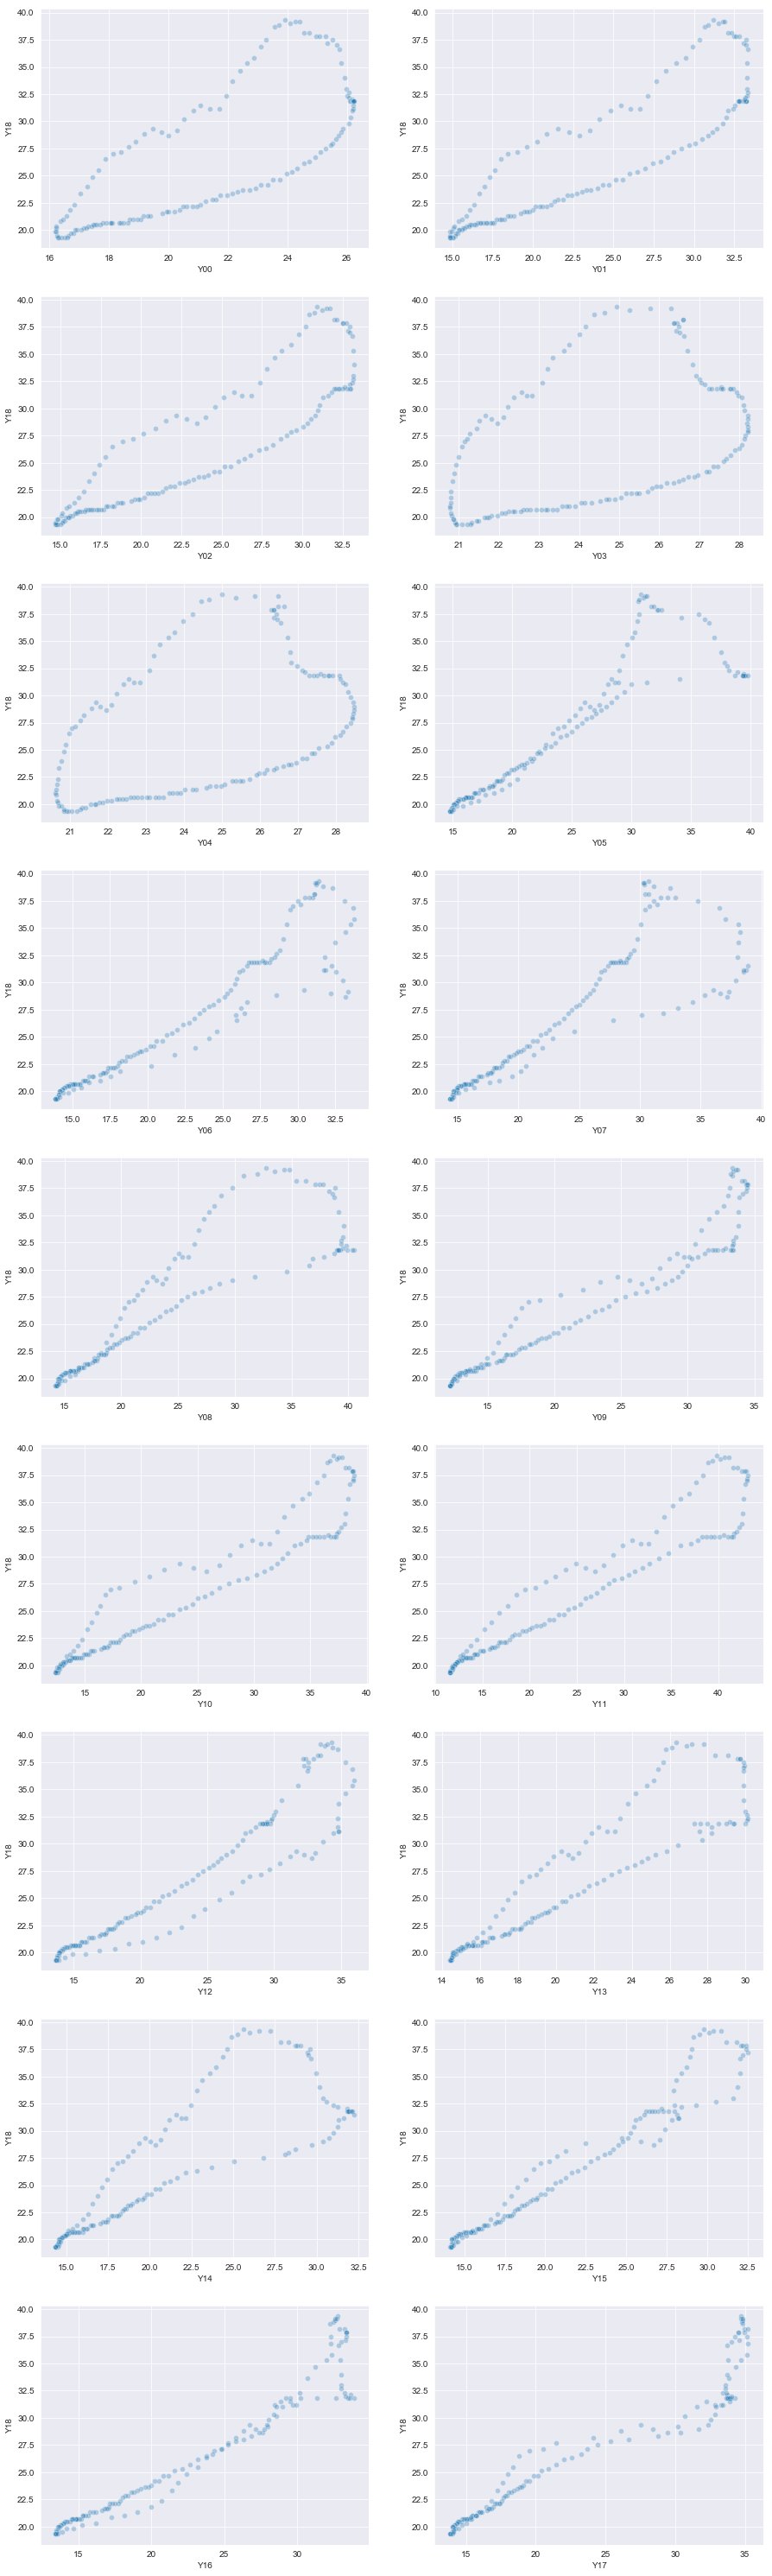

In [82]:
N=18
f, ax = plt.subplots(np.ceil(N//2).astype(int), 2, figsize=(15,3*N))
tmp = train.copy()
tmp['time'] = train['id']%(24*6)
tmp = tmp.groupby('time')[[col for col in train.columns if col.startswith('Y')]].mean()

for i in range(18):
    idx = str(i)
    if len(idx) == 1:
        idx = '0' + idx
    col = 'Y' + idx
    sns.scatterplot(x=tmp[col], y=tmp['Y18'], alpha=0.3, ax=ax[i//2][i%2])
plt.show() 

In [ ]:
# 시간에의한 차이는 고려안된상태임 

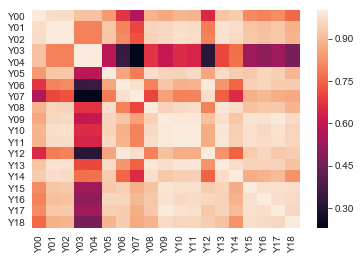

In [7]:
# Corr!
N=18
tmp = train.copy()
tmp['time'] = train['id']%(24*6)
tmp = tmp.groupby('time')[[col for col in train.columns if col.startswith('Y')]].mean()
corr = tmp.corr()
sns.heatmap(corr)
plt.show()

In [10]:
corr['Y18']

Y00    0.758540
Y01    0.883761
Y02    0.889956
Y03    0.465617
Y04    0.465258
Y05    0.892908
Y06    0.937352
Y07    0.867935
Y08    0.887666
Y09    0.964347
Y10    0.954769
Y11    0.957035
Y12    0.937467
Y13    0.917833
Y14    0.831036
Y15    0.974505
Y16    0.964310
Y17    0.960182
Y18    1.000000
Name: Y18, dtype: float64

In [14]:
sorted(tuple(zip(corr['Y18'].index, corr['Y18'])), key = lambda x: x[1], reverse=True)

[('Y18', 1.0),
 ('Y15', 0.9745046108820001),
 ('Y09', 0.9643473712459198),
 ('Y16', 0.9643101166279805),
 ('Y17', 0.9601816458414463),
 ('Y11', 0.9570347699048056),
 ('Y10', 0.9547693404761106),
 ('Y12', 0.9374668338679305),
 ('Y06', 0.9373515355040593),
 ('Y13', 0.9178325976960979),
 ('Y05', 0.8929082433489538),
 ('Y02', 0.8899555520763266),
 ('Y08', 0.8876656500428569),
 ('Y01', 0.8837613601199993),
 ('Y07', 0.8679345127683809),
 ('Y14', 0.8310358992858167),
 ('Y00', 0.7585397118381295),
 ('Y03', 0.4656168481497578),
 ('Y04', 0.4652579533175972)]

In [1]:
# 어떻게 동그라미패턴이나오지../? > 시간차떄문에 생긴 계절변화차이인가  ????
# 5, 6, 7, 9, 10, 11, 12, 13. 15, 16, 17 이 18과 비슷

### Correlation

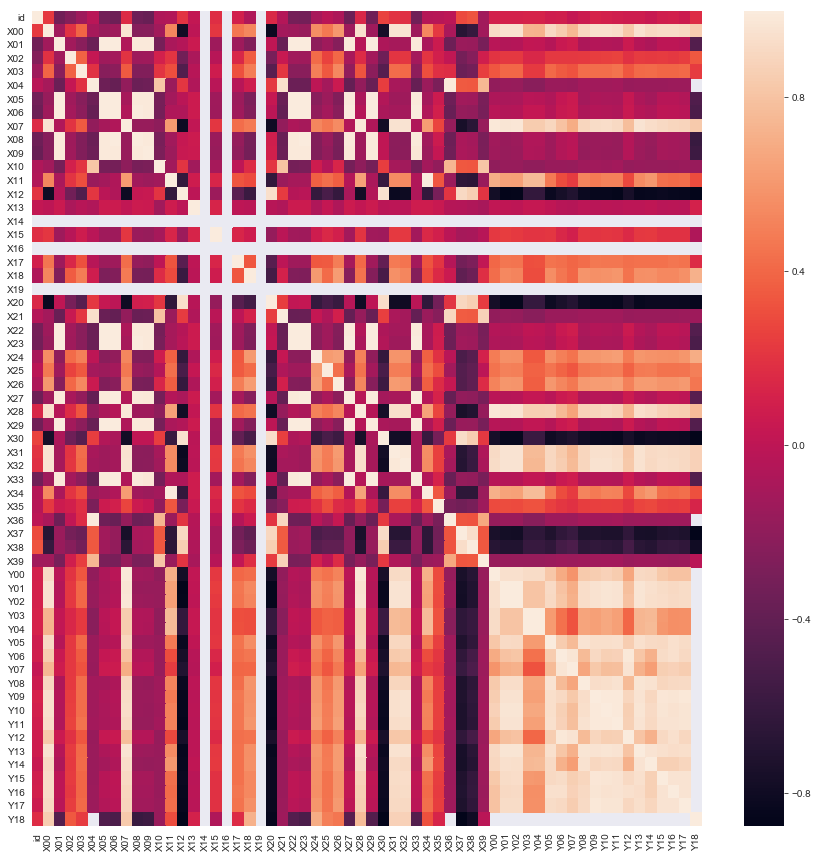

In [19]:
tmp = train.copy()
tmp.drop('id',axis=1)
corr = tmp.corr()

plt.figure(figsize = (15,15))
sns.heatmap(corr)
plt.show()

### 아웃라이어 체킹

In [13]:
from sklearn.preprocessing import StandardScaler
tmp = StandardScaler(sorted(train['Y18'][~train['Y18'].isnull()]))


In [15]:
tmp

StandardScaler(copy=[18.5, 18.5, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.5, 19.5, 19.5, 19.5, 19.5, 19.5, 19.5, 19.5, 19.5, 19.5, 19.5, 19.5, 19.5, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.5, 20.5, 20.5, 20.5, ...9.0, 39.0, 39.5, 39.5, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.5, 40.5, 41.0, 41.0, 41.0, 41.0, 41.5],
        with_mean=True, with_std=True)

### Clustering

In [79]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Kmeans 
n_cluster=6
km = KMeans(n_clusters=n_cluster)

tmp = train.loc[:4319, [col for col in train.columns if col.startswith('Y') and col != 'Y18']].transpose()
cluster_idx = km.fit_predict(tmp)

for i  in range(n_cluster):
    print('Cluster {}:'.format(i),  tmp.index[cluster_idx==i])
    

Cluster 0: Index(['Y05', 'Y09', 'Y16', 'Y17'], dtype='object')
Cluster 1: Index(['Y03', 'Y04'], dtype='object')
Cluster 2: Index(['Y06', 'Y07', 'Y12'], dtype='object')
Cluster 3: Index(['Y01', 'Y02'], dtype='object')
Cluster 4: Index(['Y00', 'Y13', 'Y14', 'Y15'], dtype='object')
Cluster 5: Index(['Y08', 'Y10', 'Y11'], dtype='object')


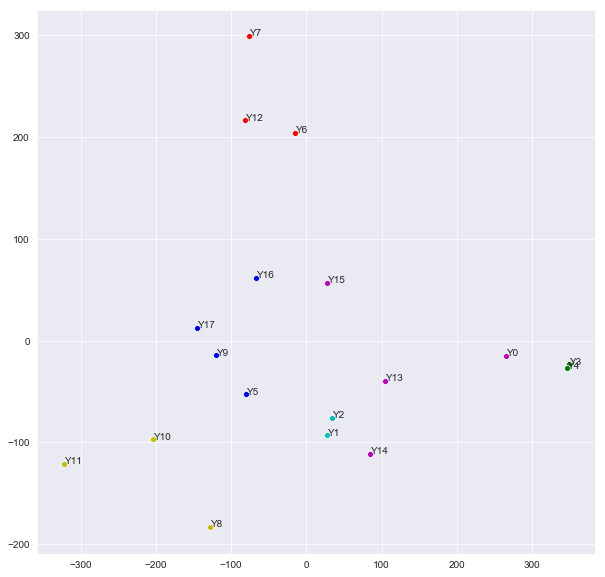

In [93]:
# Graph
pca = PCA(n_components=2)
tmp_pca = pca.fit_transform(tmp)

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
plt.figure(figsize=(10,10))
for i in range(n_cluster):
    sns.scatterplot(x=tmp_pca[cluster_idx==i,0], y=tmp_pca[cluster_idx==i,1], color=colors[i])

for i in range(len(tmp_pca)):
    plt.text(s='Y{}'.format(i), x=tmp_pca[i,0], y=tmp_pca[i,1])

plt.show()

# b: blue.
# g: green.
# r: red.
# c: cyan.
# m: magenta.
# y: yellow.
# k: black.
# w: white.

### 시간에따른 누적일사량 

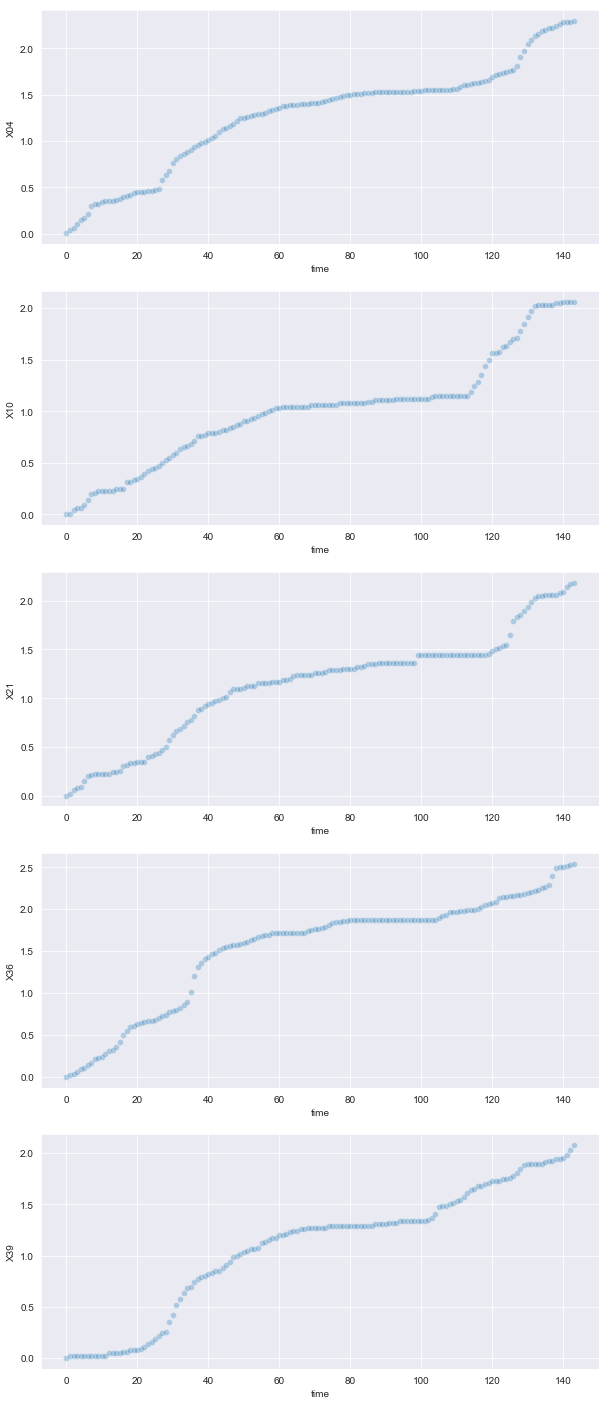

In [103]:
tmp = train.copy()
tmp['time'] = tmp['id']%144
tmp_agg = tmp.groupby('time')[['X04', 'X10', 'X21', 'X36', 'X39']].mean()
f, ax = plt.subplots(5,1, figsize=(10,5*5))
i=0
for col in ['X04', 'X10', 'X21', 'X36', 'X39']:
    sns.scatterplot(x=tmp_agg.index, y=tmp_agg[col], ax=ax[i], alpha=0.3)
    i+=1
plt.show()

In [ ]:
# 60~ 110이 밤이다 